In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt



In [22]:
df = pd.read_csv('dataset/main/credit_train.csv')

In [23]:
# Data Preprocessing
# Handle missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 for simplicity

def convert_credit_sum(value):
    try:
        return float(value.replace(',', '.'))
    except:
        return 0
    
# Convert incorrect data types to numerical
df['credit_sum'] = df['credit_sum'].apply(convert_credit_sum)
df['score_shk'] = df['score_shk'].str.replace(',', '.').astype(float)


Scale numerical features 

In [ ]:
# Select the numerical columns for scaling
numerical_cols = ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']

# Initialize Min-Max Scaler
minmax_scaler = MinMaxScaler()

# Apply Min-Max Scaling to selected columns
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Standard Scaling to selected columns
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

In [17]:
# Create the interaction feature
df['age_credit_interaction'] = df['age'] * df['credit_month']
# df = df.drop(columns=['age', 'credit_month'])

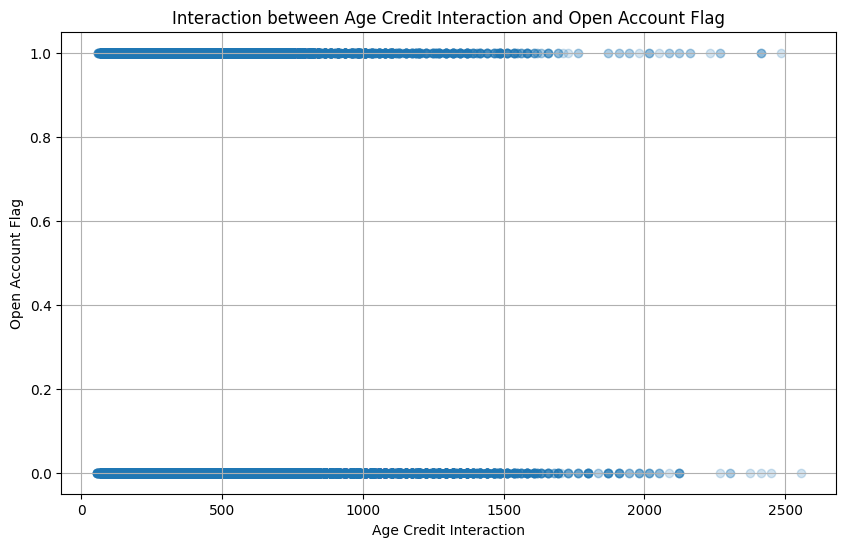

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age_credit_interaction'], df['open_account_flg'], alpha=0.2)
plt.xlabel('Age Credit Interaction')
plt.ylabel('Open Account Flag')
plt.title('Interaction between Age Credit Interaction and Open Account Flag')
plt.grid(True)
plt.show()

In [24]:
# Define the bin edges and labels for age groups
bin_edges = [0, 25, 40, 60, float('inf')]
bin_labels = ['young', 'adult', 'senior', 'elderly']

# Bin the 'age' feature into age groups
df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

# Drop the original 'age' column if desired
# df = df.drop(columns=['age'])

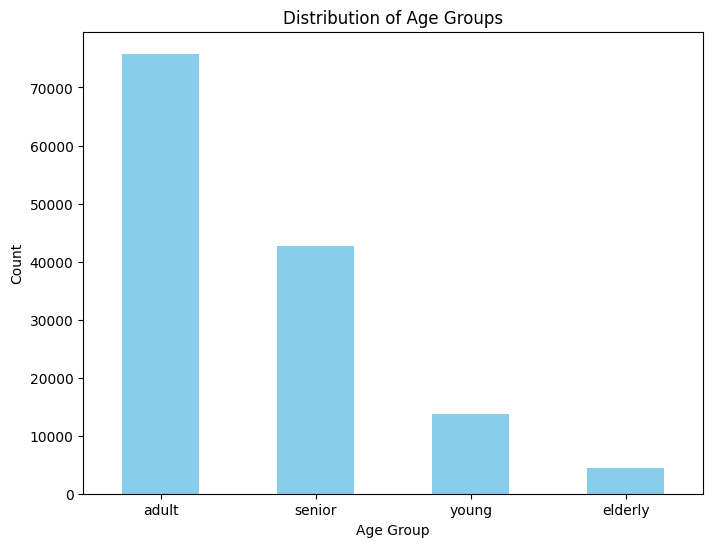

In [25]:
# Count the occurrences of each age group
age_group_counts = df['age_group'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=0)
plt.show()